In [76]:
import warnings
warnings.filterwarnings('ignore')

import os 
import pandas as pd

In [77]:
dir_Path = "/home/abdel/Documents/DOTNET_Project/Data backup/DataRepo/TEST"
os.chdir(dir_Path)

In [78]:
import pandas as pd 

Reviewdata = pd.read_csv('merged_revs.csv')

In [79]:
Reviewdata.shape

(23695, 7)

In [80]:
Reviewdata.head()

,Unnamed: 0,month,rate,title,review,name,city
0,0,April 2012,5,"Unique, large & helpful",We stayed here for a few nights after staying ...,Hotel_Spa_Riad_Dar_Bensouda,Fes_Fes_Meknes
1,1,December 2012,5,The Best Riad in Fez,My wife and I were in Morocco for about 10 day...,Hotel_Spa_Riad_Dar_Bensouda,Fes_Fes_Meknes
2,2,December 2012,4,Gorgeous restoration,We loved the staff here! This gorgeous restora...,Hotel_Spa_Riad_Dar_Bensouda,Fes_Fes_Meknes
3,3,October 2012,5,"Beautiful, perfect, amazing.",I feel like the other reviewers have already s...,Hotel_Spa_Riad_Dar_Bensouda,Fes_Fes_Meknes
4,4,January 2013,5,Perfection,Truly beautiful Riad and service exceptional.A...,Hotel_Spa_Riad_Dar_Bensouda,Fes_Fes_Meknes


In [81]:
Reviewdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23695 entries, 0 to 23694
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  23695 non-null  int64 
 1   month       23695 non-null  object
 2   rate        23695 non-null  int64 
 3   title       23694 non-null  object
 4   review      23695 non-null  object
 5   name        23695 non-null  object
 6   city        9135 non-null   object
dtypes: int64(2), object(5)
memory usage: 1.3+ MB


In [82]:
Reviewdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,23695.0,11847.000000,6840.30165,0.0,5923.5,11847.0,17770.5,23694.0
rate,23695.0,4.412956,0.98345,1.0,4.0,5.0,5.0,5.0


# DATA CLEANING 

In [83]:
count = Reviewdata.isnull().sum().sort_values(ascending=False)
percentage = ((Reviewdata.isnull()).sum()/len(Reviewdata)*100).sort_values(ascending=False)

missing_data = pd.concat([count, percentage], axis=1, keys =['count','percentage'])
print('count and percentage of missing values for columns')

missing_data

count and percentage of missing values for columns


,count,percentage
city,14560,61.447563
title,1,0.004220
Unnamed: 0,0,0.000000
month,0,0.000000
rate,0,0.000000
review,0,0.000000
name,0,0.000000


In [84]:
Reviewdata.drop(columns=['month','name'], inplace=True)

Percentage for default

5    64.85
4    21.02
3     7.95
1     3.25
2     2.93
Name: rate, dtype: float64


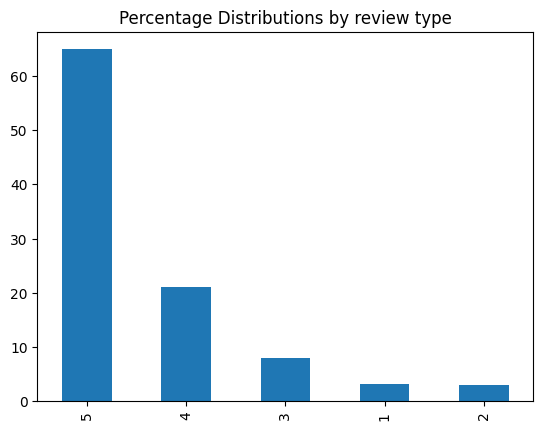

In [85]:
##DATA CLEANING 
import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for default\n')
print(round(Reviewdata.rate.value_counts(normalize=True)*100,2))
round(Reviewdata.rate.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()


In [86]:
# Apply first level cleaning
import re
import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned1 = lambda x: text_clean_1(x)

In [87]:
# Let's take a look at the updated text
Reviewdata['cleaned_Reviews'] = pd.DataFrame(Reviewdata.review.apply(cleaned1))
Reviewdata.head(10)

,Unnamed: 0,rate,title,review,city,cleaned_Reviews
0,0,5,"Unique, large & helpful",We stayed here for a few nights after staying ...,Fes_Fes_Meknes,we stayed here for a few nights after staying ...
1,1,5,The Best Riad in Fez,My wife and I were in Morocco for about 10 day...,Fes_Fes_Meknes,my wife and i were in morocco for about days ...
2,2,4,Gorgeous restoration,We loved the staff here! This gorgeous restora...,Fes_Fes_Meknes,we loved the staff here this gorgeous restorat...
3,3,5,"Beautiful, perfect, amazing.",I feel like the other reviewers have already s...,Fes_Fes_Meknes,i feel like the other reviewers have already s...
4,4,5,Perfection,Truly beautiful Riad and service exceptional.A...,Fes_Fes_Meknes,truly beautiful riad and service exceptionalal...
5,5,5,Absolutely amazing,Oh my goodness I could not rate this hotel any...,Fes_Fes_Meknes,oh my goodness i could not rate this hotel any...
6,6,5,Great stay,I enjoyed every bit of my stay at Riad Dar Ben...,Fes_Fes_Meknes,i enjoyed every bit of my stay at riad dar ben...
7,7,5,A fine riad with great service,The riad is in the heart of the medina and is ...,Fes_Fes_Meknes,the riad is in the heart of the medina and is ...
8,8,5,Wonderful oasis in the Medina!,We enjoyed our stay at Dar Bensouda! Hamid cou...,Fes_Fes_Meknes,we enjoyed our stay at dar bensouda hamid coul...
9,9,4,Hidden gem in the Medina,Absolutely loved our stay at Dar Bensouda. Lik...,Fes_Fes_Meknes,absolutely loved our stay at dar bensouda like...


In [88]:
Reviewdata.head()

,Unnamed: 0,rate,title,review,city,cleaned_Reviews
0,0,5,"Unique, large & helpful",We stayed here for a few nights after staying ...,Fes_Fes_Meknes,we stayed here for a few nights after staying ...
1,1,5,The Best Riad in Fez,My wife and I were in Morocco for about 10 day...,Fes_Fes_Meknes,my wife and i were in morocco for about days ...
2,2,4,Gorgeous restoration,We loved the staff here! This gorgeous restora...,Fes_Fes_Meknes,we loved the staff here this gorgeous restorat...
3,3,5,"Beautiful, perfect, amazing.",I feel like the other reviewers have already s...,Fes_Fes_Meknes,i feel like the other reviewers have already s...
4,4,5,Perfection,Truly beautiful Riad and service exceptional.A...,Fes_Fes_Meknes,truly beautiful riad and service exceptionalal...


In [89]:
# Apply a second round of cleaning
def text_clean_2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned2 = lambda x: text_clean_2(x)

In [90]:
# Let's take a look at the updated text
Reviewdata['Cleaned_R'] = pd.DataFrame(Reviewdata['cleaned_Reviews'].apply(cleaned2))
Reviewdata.head(10)

,Unnamed: 0,rate,title,review,city,cleaned_Reviews,Cleaned_R
0,0,5,"Unique, large & helpful",We stayed here for a few nights after staying ...,Fes_Fes_Meknes,we stayed here for a few nights after staying ...,we stayed here for a few nights after staying ...
1,1,5,The Best Riad in Fez,My wife and I were in Morocco for about 10 day...,Fes_Fes_Meknes,my wife and i were in morocco for about days ...,my wife and i were in morocco for about days ...
2,2,4,Gorgeous restoration,We loved the staff here! This gorgeous restora...,Fes_Fes_Meknes,we loved the staff here this gorgeous restorat...,we loved the staff here this gorgeous restorat...
3,3,5,"Beautiful, perfect, amazing.",I feel like the other reviewers have already s...,Fes_Fes_Meknes,i feel like the other reviewers have already s...,i feel like the other reviewers have already s...
4,4,5,Perfection,Truly beautiful Riad and service exceptional.A...,Fes_Fes_Meknes,truly beautiful riad and service exceptionalal...,truly beautiful riad and service exceptionalal...
5,5,5,Absolutely amazing,Oh my goodness I could not rate this hotel any...,Fes_Fes_Meknes,oh my goodness i could not rate this hotel any...,oh my goodness i could not rate this hotel any...
6,6,5,Great stay,I enjoyed every bit of my stay at Riad Dar Ben...,Fes_Fes_Meknes,i enjoyed every bit of my stay at riad dar ben...,i enjoyed every bit of my stay at riad dar ben...
7,7,5,A fine riad with great service,The riad is in the heart of the medina and is ...,Fes_Fes_Meknes,the riad is in the heart of the medina and is ...,the riad is in the heart of the medina and is ...
8,8,5,Wonderful oasis in the Medina!,We enjoyed our stay at Dar Bensouda! Hamid cou...,Fes_Fes_Meknes,we enjoyed our stay at dar bensouda hamid coul...,we enjoyed our stay at dar bensouda hamid coul...
9,9,4,Hidden gem in the Medina,Absolutely loved our stay at Dar Bensouda. Lik...,Fes_Fes_Meknes,absolutely loved our stay at dar bensouda like...,absolutely loved our stay at dar bensouda like...


In [91]:
Reviewdata.to_csv('CLEAAAANNNNNN.csv', index = False)

In [97]:
df = pd.read_csv('/home/abdel/Documents/DOTNET_Project/BigData.csv')
df.head()

,HotelId,Date,rate,title,Cleaned_R
0,46,01/05/12,5,"Unique, large & helpful",we stayed here for a few nights after staying ...
1,47,01/12/12,5,The Best Riad in Fez,my wife and i were in morocco for about days ...
2,48,01/12/12,4,Gorgeous restoration,we loved the staff here this gorgeous restorat...
3,49,01/10/12,5,"Beautiful, perfect, amazing.",i feel like the other reviewers have already s...
4,50,01/01/13,5,Perfection,truly beautiful riad and service exceptionalal...


In [107]:
df = pd.read_csv('/home/abdel/Documents/DOTNET_Project/new_rating.csv')




import pandas as pd

# Read the Excel file


# Iterate over the rows in the dataframe
for index, row in df.iterrows():
    # Build the INSERT statement
    #insert_stmt = f"INSERT INTO Reviews  VALUES ('{row['HotelId']}', '{row['Date']}', {row['rate']}', '{row['title']}', '{row['Cleaned_R']}');"
    insert_stmt = f"INSERT INTO Review    VALUES ({row['HotelId']}, '{row['Date']}', {row['rate']}, '{row['title']}', '{row['review']}');"
    # Print the INSERT statement
    print(insert_stmt)
    
    

INSERT INTO Review    VALUES (46, '01/05/12', 5, 'Unique, large & helpful', 'We stayed here for a few nights after staying with a Moroccan family. This was heaven. "Said" the manager and his staff are just fantastic. They are a superb group of people who work very hard to get what they need for us. Fabulous rooftop views of the city, great public spaces in the Riad and another room with super high ceilings. The Riad is an ancient building with wonderful modern bathrooms - just try to not get the room that we had which was right by the main entrance. Everyone walks back and forth. Do try to not hit your head when walking up some of the stairs! Remember to look up not down at the steps! (good advice for anywhere in the world really!) Good breakfast. Overall we enjoyed this Riad, it was very picturesque and comfortable for my wife and I.');
INSERT INTO Review    VALUES (47, '01/12/12', 5, 'The Best Riad in Fez', 'My wife and I were in Morocco for about 10 days, about 6 days in Marrakech a

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [108]:
df.head()

,HotelId,Date,rate,title,review
0,46,01/05/12,5,"Unique, large & helpful",We stayed here for a few nights after staying ...
1,47,01/12/12,5,The Best Riad in Fez,My wife and I were in Morocco for about 10 day...
2,48,01/12/12,4,Gorgeous restoration,We loved the staff here! This gorgeous restora...
3,49,01/10/12,5,"Beautiful, perfect, amazing.",I feel like the other reviewers have already s...
4,50,01/01/13,5,Perfection,Truly beautiful Riad and service exceptional.A...


In [109]:
import pandas as pd
import re

# Read the CSV file
df = pd.read_csv('/home/abdel/Documents/DOTNET_Project/new_rating.csv')

# Define the column name that contains the emojis
column_name = "review"

# Use a regular expression pattern to remove all emojis from the column
df[column_name] = df[column_name].apply(lambda x: re.sub(r"[\U0001f600-\U0001f64f]", "", x))

# Save the updated dataframe to a new CSV file
df.to_csv("without_emojis.csv", index=False)

In [ ]:
from sklearn.model_selection import train_test_split

Independent_var = Reviewdata.Cleaned_R
Dependent_var = Reviewdata.rate

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.1, random_state = 225)

print('IV_train :', len(IV_train))
print('IV_test  :', len(IV_test))
print('DV_train :', len(DV_train))
print('DV_test  :', len(DV_test))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")


from sklearn.pipeline import Pipeline

In [ ]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train, DV_train)


from sklearn.metrics import confusion_matrix

predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

In [ ]:
exemple = ["bad"]
result = model.predict(exemple)
print(result)